# ETRUCTURA DE DATOS Y ANALISIS DE ALGORITMOS
# Ordenamiento topologico de un grafo

## Librerias

Las librerias que usaremos seran:

**math** : Calcular la distancia entre los nodos y realizar otras operaciones aritmeticas.

**matplotlib** y **networkx** : Representar el grafo 

In [77]:
import math
import matplotlib.pyplot as plt
import networkx as nx

## Estructuras de datos iniciales

Para almacenar las relaciones de adyacencia entre los vertices de nuestro grafo usaremos un **diccionario** el cual para nuestro problema se comporta igual que una lista de adyacencia

In [78]:
# Cada indice del diccionario es un vertices y sus items son aquellos vertices que son adyacentes a este
# El grafo que usaremos debe ser un grafo aciclico dada la definicion del algoritmo

grafo = {
    6 : {4,5},
    5 : {},
    4 : {5},
    3 : {5},
    2 : {3 , 4},
    1 : {2 , 3 , 6}
}

# muestra [1, 2, 3, 4, 6, 5]

In [79]:
# Cada indice del diccionario es un vertices y sus items son aquellos vertices que son adyacentes a este
# El grafo que usaremos debe ser un grafo aciclico dada la definicion del algoritmo
grafo = {
    1 : {2 , 3 , 6},
    2 : {3 , 4},
    3 : {5},
    4 : {5},
    5 : {},
    6 : {4,5}
}
# muestra  [1, 6, 2, 4, 3, 5]

## Ordenamiento topologico

Una **ordenación topológica** (topological sort, topological ordering, topsort o toposort en inglés) de un **grafo acíclico** *G* dirigido es una ordenación lineal de todos los nodos de *G* que conserva la unión entre vértices del grafo *G* original. La condición que el grafo no contenga ciclos es importante, ya que no se puede obtener ordenación topológica de grafos que contengan ciclos.

Luego ademas de implementar el algoritmo de ordenamiento topologico primero implementaremos un algoritmo que verifique si nuestro grafo *G* es **acíclico**

## DAG tester
### Procedimiento
* Iteramos cada vertice *V* del grafo *G*
* Para cada vertice *V* :
    * Comprobamos si el conjunto de vertices adyacentes de *V* contienen el vertice *V*
    * Si no se cumple lo anterior iteramos sobre los vertices *U* adyacentes de *V*
    * Comprobamos si el conjunto de vertices adyacente de *U* contienen el vertice *V*
    * Si no se cumple lo anterior iteramos sobre los vertices *W* adyacentes de *V* 
* Realizamos este procedimiento recursivamente hasta llegar a un conjunto de vertices que contenga al vertice padre *V* o en su defecto sea el conjunto vacio
* Si en algun punto llegamos a un conjunto de vertices que contiene el vertice padre *V* entonces el grafo *G* contiene ciclos
* De lo contrario, Si siempre llegamos al conjunto vacio luego quiere decir que el grafo *G* es acíclico

### Implementacion
** Datos de entrada **
* **grafo:** Diccionario en el cual se almacena como **indice** el vertice y como items sus vertices **adyacentes**

In [80]:
def recorrer(u, aristas, padre,grafo):
    if(len(aristas) == 0):
        return 0
    for i in aristas:
        if(i == padre):
            return 1
    for v in aristas:
        return  0 + recorrer(v,grafo[v],padre,grafo)

def DAG(grafo):
    x = 0
    for i in grafo:
        x += recorrer(i,grafo[i],i,grafo)  
    if(x != 0):
        print("El grafo contiene ciclos")
    else:
        print("El grafo es acíclico")
        

## Ordenamiento topologico
### Procedimiento

* Buscar un vértice *V* que no contenga predecesores (Sin arcos de entrada)
* Este vértice *V* pasa a formar parte de ula ordenación *T* (Cola)
* Ya que el vértice sin predecesores, se aádio a *T*, este es eliminado del grafo inicial (Todos los arcos que salen de *V* son eliminados). Y se disminuye el grafo de los vértices adyacentes.
* Se repite el proceso
* Se toma otro vértices *W*, que no contengan archos de entrada
* Se incorpora a la ordenación *T*

### Implementacion
** Datos de entrada **
* **grafo:** Diccionario en el cual se almacena como **indice** el vertice y como items sus vertices **adyacentes**
* **lista:** Lista en la cual agregaremos los vertices del grafo *G* sastifaciendo la defición de **ordenamiento topologico**

In [81]:
def visitar(u,estado,lista):
    # Al entrar a la funcion visitar()
    # Significa que estamos visitando el vertices u 
    # luego lo guardamos como True: Visitado
    # en nuestro diccionario estado
    estado[u] = True
    for v in grafo[u]: # Recorremos todos los vertices adyacentes al vertice u
        if(estado[v] == False):
            # Si aun no hemos visitado el vertice v
            # entonces lo visitamos
            visitar(v,estado,lista)
            
    # Luego de haber visitado todos los vertices adyacentes de u
    # ya no tenemos que seguir utilizando a u entonces
    lista.insert(0,u) # Insertamos el vertice u al inicio de nuestra lista

In [82]:
def ordenamiento_topologico(grafo, lista):
    # Almacena el estado de cada vertice, False:No Visitado, True: Visitado
    estado = {} 
    for u in grafo:
        # Al inicio agregamos todos los vertices a nuestro diccionario y
        # y guardamos su estado como False: No visitado
        estado[u] = False
    for u in grafo: # Recorremos todos los vertices del grafo
        if( estado[u] == False):
            # Si aun no hemos visitado el vertice u
            # entonces lo visitamos
            visitar(u,estado,lista)

## Representacion del grafo

Para representar el grafo usaremos la libreria **networkx** la cual llamaremos *nx*.
La representación del grafo consta de 2 partes:
1. Transcripcion
2. Dibujado
    
   **Transcripción**
    * Crear un grafo $G$ de la libreria *nx*
    * Añadir las aristas de nuestro diccionario *grafo* $G$
    * Crear un diccionario *dict* en donde guardaremos las posiciones correspondientes a cada vertice

   **Dibujado**
    * Ajustar el tamaño del *canvas*
    * Dibujar los nodos
    * Dibujar las aristas
    * Dibujar las etiquetas de los nodos
    * Dibujas las etiquetas y pesos de las aritas
    * Mostrar el grafo
    
### Transcripción

In [83]:
# Creacion del grafo
G = nx.DiGraph()

for i in grafo:
    x = grafo[i]
    for j in x:
        G.add_edge(i,j)
        
dict = {
    1 : (0,1),
    2 : (0.8,1),
    3 : (0.8,0),
    4 : (1.6,1),
    5 : (2,0),
    6 : (2,2)
}

pos = dict

### Dibujado

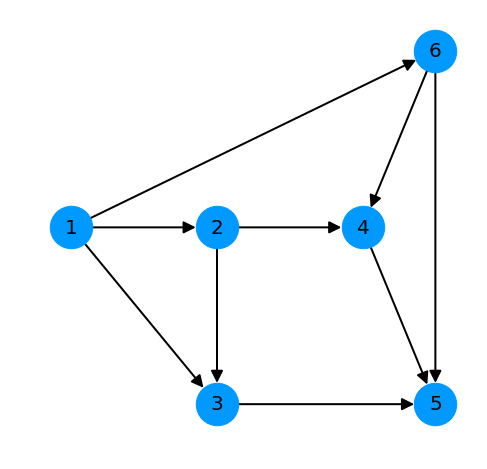

In [84]:
plt.figure(figsize = (8,8))
nx.draw_networkx_edges(G, pos, node_size=1800, width=2, arrowsize=25)
nx.draw_networkx_nodes(G, pos, node_size=1800, node_color =  (0, 0.6, 1))
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
plt.axis("off")
plt.show()

## Ejecucion de DAG tester

In [85]:
DAG(grafo)

El grafo es acíclico


Dado que ya verificamos que nuestro grafo es acíclico procedemos a ordenarlo topologicamente

## Ejecucion del algoritmo: Ordenamiento topologico

In [86]:
lista = []
ordenamiento_topologico(grafo,lista)
print("El ordenamiento topologico del grafo es: ",lista)

El ordenamiento topologico del grafo es:  [1, 6, 2, 4, 3, 5]


# Grafo aciclico con 10 vertices

Ahora veremos un ejemplo con un grafo de 10 vertices

## Estructuras de datos iniciales

In [87]:
# Creamos el nuevo grafo que ahora usaremos
grafo = {
    1  : {2,3,6},
    2  : {3,4,6},
    3  : {5,6},
    4  : {6,7},
    5  : {4,6,8},
    6  : {7,8,9},
    7  : {9,10},
    8  : {9,10},
    9  : {10},
    10 : {}
}

# muestra [1, 2, 3, 5, 4, 6, 7, 8, 9, 10]

## Representacion del grafo

### Transcripción

In [88]:
G = nx.DiGraph()

for i in grafo:
    x = grafo[i]
    for j in x:
        G.add_edge(i,j)
        
        
dict = {
    1  : (1,11),
    2  : (0,9),
    3  : (2,9),
    4  : (0,6),
    5  : (2,6),
    6  : (1,4.5),
    7  : (0,3),
    8  : (2,3),
    9  : (1,2),
    10 : (1,0) 
    
}

pos = dict

### Dibujado

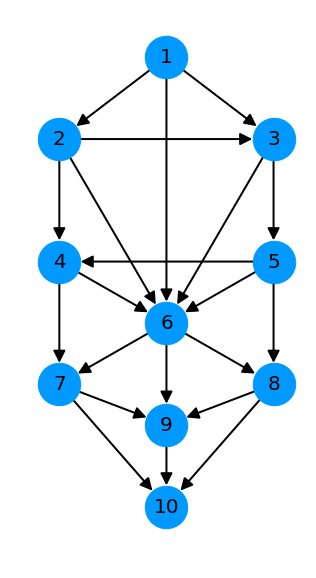

In [89]:
plt.figure(figsize = (5,10))
nx.draw_networkx_edges(G, pos, node_size=1800, width=2, arrowsize=25)
nx.draw_networkx_nodes(G, pos, node_size=1800, node_color =  (0, 0.6, 1))
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
plt.axis("off")
plt.show()

## Ejecucion del DAG tester

In [90]:
DAG(grafo)

El grafo es acíclico


Dado que ya verificamos que nuestro grafo es acíclico procedemos a ordenarlo topologicamente

In [91]:
lista = []
ordenamiento_topologico(grafo,lista)
print("El ordenamiento topologico del grafo es: ",lista)

El ordenamiento topologico del grafo es:  [1, 2, 3, 5, 4, 6, 7, 8, 9, 10]


# Grafo aciclico con 20 vertices
Ahora veremos un ejemplo con un grafo de 20 vertices

## Estructuras de datos iniciales

In [92]:
grafo = {
    1  : {2,3,4,5},
    2  : {8,9},
    3  : {5,6,9},
    4  : {3,7,9},
    5  : {9,11,14},
    6  : {9,13,12,16},
    7  : {6,13,15},
    8  : {9,10,11,12},
    9  : {13},
    10 : {14,15},
    11 : {10,12,15,14,17},
    12 : {16,17},
    14 : {},
    13 : {16,18},
    15 : {17,18},
    16 : {18,19},
    17 : {18,20},
    18 : {20,19},
    19 : {},
    20 : {}
}

# muestra [1, 4, 7, 3, 6, 5, 2, 8, 11, 12, 10, 15, 17, 14, 9, 13, 16, 18, 20, 19]

## Representacion del grafo
### Transcipcion

In [93]:
G = nx.DiGraph()

for i in grafo:
    x = grafo[i]
    for j in x:
        G.add_edge(i,j)
        
dict = {
    1  : (3,7),
    2  : (2,6),
    3  : (3,6),
    4  : (4,6),
    5  : (2,5),
    6  : (4,5),
    7  : (5,5),
    8  : (1,4),
    9  : (3,4),
    10 : (0,3),
    11 : (2,3),
    12 : (3,3),
    13 : (5,3),
    14 : (1,2),
    15 : (3,2),
    16 : (4,2),
    17 : (2,1),
    18 : (4,1),
    19 : (5.5,1),
    20 : (3,0)
    
    
}

pos = dict

### Dibujado

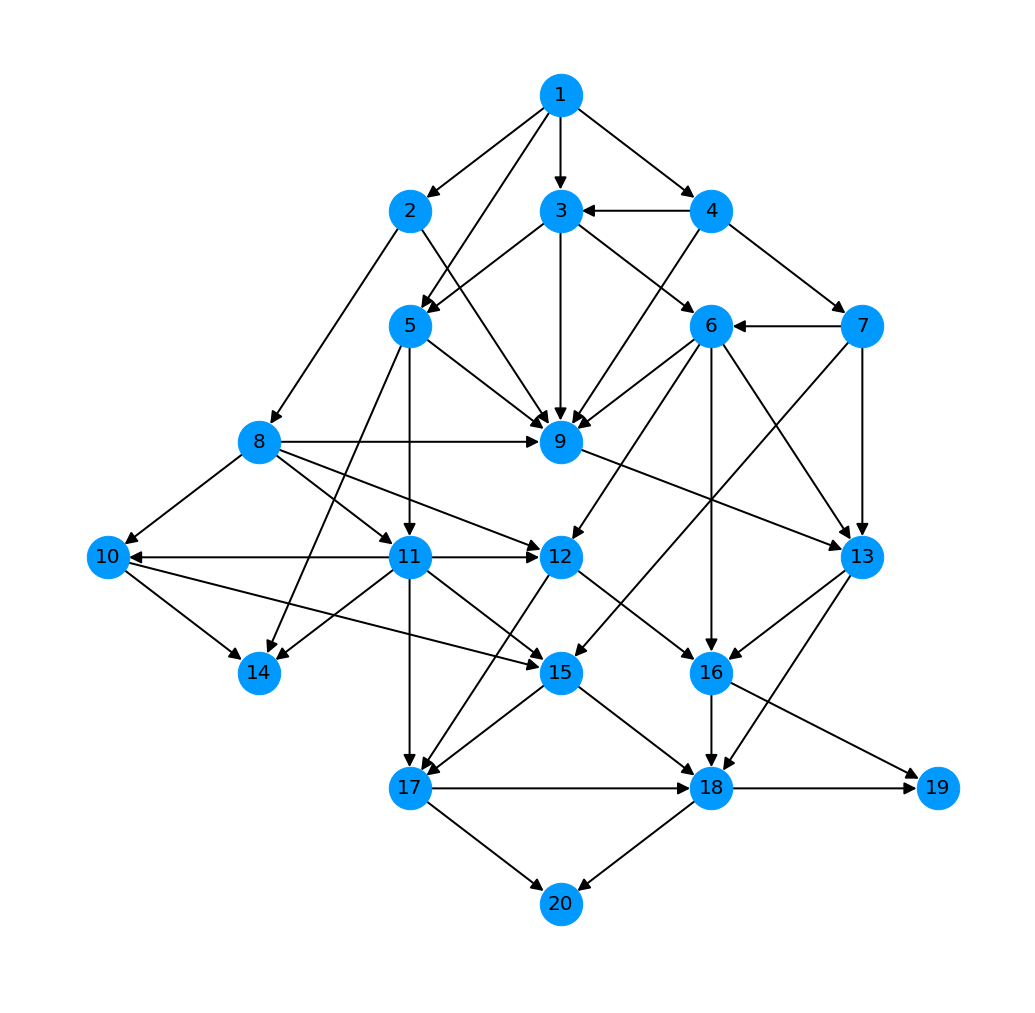

In [94]:
plt.figure(figsize = (18,18))
nx.draw_networkx_edges(G, pos, node_size=1800, width=2, arrowsize=25)
nx.draw_networkx_nodes(G, pos, node_size=1800, node_color =  (0, 0.6, 1))
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
plt.axis("off")
plt.show()

## Ejecucion del DAG tester

In [98]:
DAG(grafo)

El grafo es acíclico


Dado que ya verificamos que nuestro grafo es acíclico procedemos a ordenarlo topologicamente

## Ejecucion del algoritmo 

In [96]:
lista = []
ordenamiento_topologico(grafo,lista)
print("El ordenamiento topologico del grafo es: ",lista)

El ordenamiento topologico del grafo es:  [1, 4, 7, 3, 6, 5, 2, 8, 11, 12, 10, 15, 17, 14, 9, 13, 16, 18, 20, 19]
